**Importing Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Data Collection and Processing**

In [ ]:
loan_dataset = pd.read_csv('/content/Loan Status.csv')

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
#printing the 1st five rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#printing the number of rows and column
loan_dataset.shape

(614, 13)

In [ ]:
#statistical measure
loan_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [ ]:
#Number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
#Recheck missing values in each column as we drop missing values in the above cell
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Label Encoding
loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

<ipython-input-10-ba9be88a8815>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)


In [ ]:
#print 1st five rows of dataframe to check Label Encoding implementation
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
#Rechecking shape of the dataframe as we removed missing values rows
loan_dataset.shape

(480, 13)

In [ ]:
#Dependent Column Values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [ ]:
#We're replacing the value 3+ to 4
loan_dataset.replace({'3+':4}, inplace=True)

<ipython-input-14-bc10c664ed62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({'3+':4}, inplace=True)


In [ ]:
#Dependent Column Values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

**Data Visualization**

<Axes: xlabel='Education', ylabel='count'>

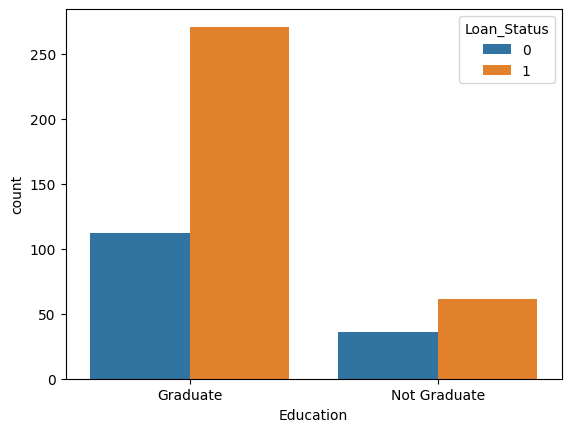

In [ ]:
#Education and Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

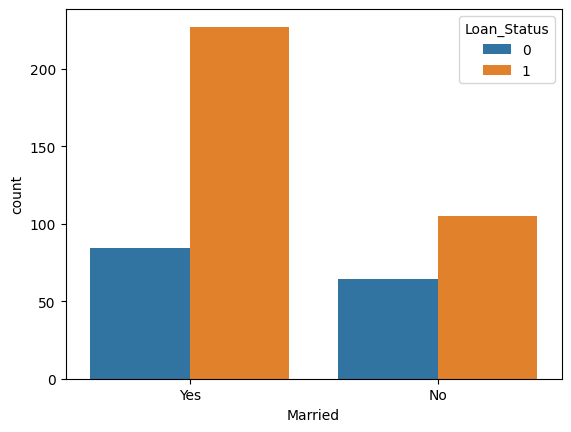

In [ ]:
# Marital Status vs Loan Status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

In [ ]:
#convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0, 'Yes':1},
                      'Gender':{'Male':1, 'Female':0},
                      'Self_Employed':{'No':0, 'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                      'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
#Separating the data and label
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']

In [ ]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state = 2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


**Training the Model**

*Support Vector Machine Model*

In [ ]:
classifier = svm.SVC(kernel='linear')


In [ ]:
#training the support vector machine model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
#accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.7986111111111112


In [ ]:
#accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on testing data: ", testing_data_accuracy)

Accuracy on testing data:  0.8333333333333334


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


**Making Predictive System**

In [ ]:
csv_data = loan_dataset.to_csv(index=False)
print(csv_data)

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
LP001014,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,0
LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0
LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,1
LP001028,1,1,2,1,0,3073,8106.0,200.0,360.0,1.0,2,1
LP001029,1,0,0,1,0,1853,2840.0,114.0,360.0,1.0,0,0
LP001030,1,1,2,1,0,1299,1086.0,17.0,120.0,1.0,2,1
LP001032,1,0,0,1,0,4950,0.0,125.0,360.0,1.0,2,1
LP001036,0,0,0,1,0,3510,0.0,76.0,360.0,0.0,2,0
LP001038,1,1,0,0,0,4887,0.0,133.0,360.0,1.0,0,0
LP001043,1,1,0,0,0,7660,0.0,104.0,360.0,0.

In [ ]:
input_data = tuple(input().split(','))


#changing the input_data (tuple) to np array
input_data_as_np_array = np.array(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if prediction == 0:
  print("Not Approved")
else:
  print("Approved")

1,1,2,1,0,5780,0.0,192.0,360.0,1.0,2
[1]
Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
